In [52]:
from groupy import config, Group
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline

In [53]:
# get group; if don't know group_id can filter by name (but name liable to change)
config.API_KEY = 'Obswbyyf83EViCprfCOJHER8XbhMCd0Up99c3FBj'
rip = Group.list().filter(group_id='13678029')[0] # rip city
# rip = Group.list().filter(group_id='24338846')[0] # stag city

In [54]:
# make a dict to go from user_ids to current name
rip_names = list(map(str, rip.members()))
rip_ids = list(map(lambda x: str(x.user_id), rip.members()))
rip_dict = dict(zip(rip_ids, rip_names))
# find and change accordingly
rip_dict['system'] = 'system'
rip_dict['354536'] = 'ripbot'
# rip_dict['356381'] = 'fitbot'

In [55]:
rip.message_count

11616

In [56]:
# get all messages (11,000+)
messages = rip.messages()
while messages.iolder():
    pass

In [57]:
# get info about messages
m_times = [m.created_at for m in messages]
m_users = [m.user_id for m in messages]
m_likes = [len(m.likes()) for m in messages]
m_text = [str(m.text).strip() for m in messages]

In [58]:
# put into dataframe
df = pd.DataFrame({'user_id':m_users}, index=m_times)
df['name'] = df['user_id'].map(rip_dict)
df['likes'] = m_likes
df['text'] = m_text
df['chars'] = df['text'].map(lambda x: len(x))

In [59]:
df.head()

,user_id,name,likes,text,chars
2016-11-11 11:52:39,9197895,Kyle Barton,1,Hey rip. @Tiemo Sebastian And I are lifting at...,239
2016-11-09 00:20:15,354536,ripbot,0,"Tanner Marshall now has 1 point, most recently...",87
2016-11-09 00:20:14,13657495,Tiemo Sebastian,7,@Tanner Marshall ++ for moving to Canada befor...,60
2016-11-08 14:21:55,26742948,Augirth,0,God what a cutie,16
2016-11-08 14:02:59,7246774,Tanner Marshall,4,"Ah yes, the pre-hat era, some know it as the h...",58


In [60]:
# calc some stats
stats = pd.DataFrame({'messages':df['name'].value_counts()})
stats.index.rename('name', inplace=True)
sums = df.groupby(['name']).sum()

stats = stats.merge(sums, left_index=True, right_index=True)
stats['like_per_m'] = stats['likes'] / stats['messages']
stats['like_per_char'] = stats['likes'] / stats['chars']

In [61]:
num_m = stats['messages'].sum()
num_l = stats['likes'].sum()

In [62]:
stats['perc_m'] = stats['messages'] / num_m * 100
stats['perc_l'] = stats['likes'] / num_l * 100

In [63]:
stats.sort_values('messages', ascending=False)

,messages,likes,chars,like_per_m,like_per_char,perc_m,perc_l
name,,,,,,,
Touches,1359,1103,51049,0.811626,0.021607,12.913341,10.732704
Augirth,1074,987,38505,0.918994,0.025633,10.205245,9.603970
gilbert mcintire,1010,966,48415,0.956436,0.019952,9.597111,9.399630
Austin Kelly,984,980,48243,0.995935,0.020314,9.350057,9.535857
boobs,485,475,20209,0.979381,0.023504,4.608514,4.621971
AT,440,422,13876,0.959091,0.030412,4.180920,4.106257
Kyle Barton,372,304,17993,0.817204,0.016895,3.534778,2.958062
system,356,222,15930,0.623596,0.013936,3.382744,2.160163
Blaydong,344,481,15268,1.398256,0.031504,3.268719,4.680354


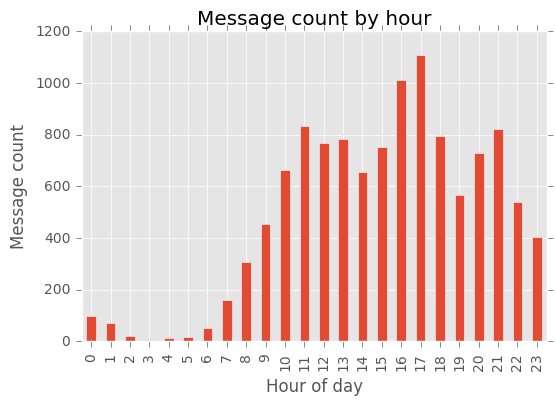

In [64]:
# do some plotting
ax = df.groupby([df.index.hour])['user_id'].count().plot(kind='bar')
ax.set_ylabel('Message count')
ax.set_xlabel('Hour of day')
ax.set_title('Message count by hour')

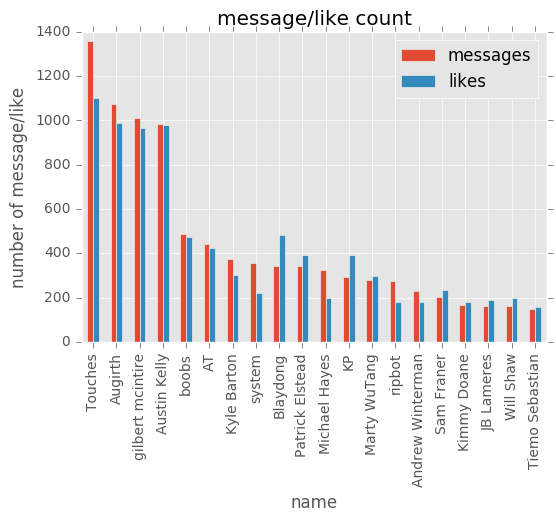

In [65]:
ax2 = stats[['messages', 'likes']].sort_values('messages', ascending=False).head(20).plot(kind='bar', stacked=False)
ax2.set_ylabel('number of message/like')
ax2.set_title('message/like count')

In [80]:
with open('corpus.txt', 'w') as f:
    for m in df['text']:
        try:
            f.write(m + '\n\n')
        except UnicodeEncodeError:
            pass

In [81]:
with open('corpus.txt', 'r') as f:
    text = f.read()

In [82]:
import markovify

text_model = markovify.NewlineText(text)

In [85]:
for i in range(5):
    print(text_model.make_sentence())

We should go downtown to rouge at 6:30 in any case. We can share next weekend with Knapp
Did not expect that guy won player of the day
@gilbert mcintire -- because it deserves for not being chipotle.
Gotta be at Buckman field at fern hill to look at dat photo. Brants so cute
I hope you took a quick shit but no dick pics from me cause I sliced the shit out of work. Be there though.


In [92]:
for i in range(3):
    print(text_model.make_short_sentence(140))

Myself -- for having one friend
How did you not get ahead of ourselves here. Larry's looking pretty stacked this year. And Ben has a world class disc golf
Soccer on turf. We are considering camping. It's a programmer nerd event
